<a href="https://colab.research.google.com/github/hrnnikolov/ML_models/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    # innitiating the 3 layers(2-hidden ,1-output layer)
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:
torch.manual_seed(3)

model = Model()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('IRIS.csv')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['species'] = df['species'].replace('Iris-setosa', 0.0)
df['species'] = df['species'].replace('Iris-versicolor', 1.0)
df['species'] = df['species'].replace('Iris-virginica', 2.0)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
X = df.drop('species', axis=1)
y = df['species']

In [12]:
#convert to numpy arrays
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
#calculating the loss
criterion = nn.CrossEntropyLoss()
#Optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [17]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0, Loss: 1.0670832395553589
Epoch: 10, Loss: 0.8727792501449585
Epoch: 20, Loss: 0.6829473972320557
Epoch: 30, Loss: 0.5438157916069031
Epoch: 40, Loss: 0.4526301920413971
Epoch: 50, Loss: 0.39108604192733765
Epoch: 60, Loss: 0.3186812400817871
Epoch: 70, Loss: 0.22120003402233124
Epoch: 80, Loss: 0.13308893144130707
Epoch: 90, Loss: 0.08529744297266006


Text(0.5, 0, 'Epoch')

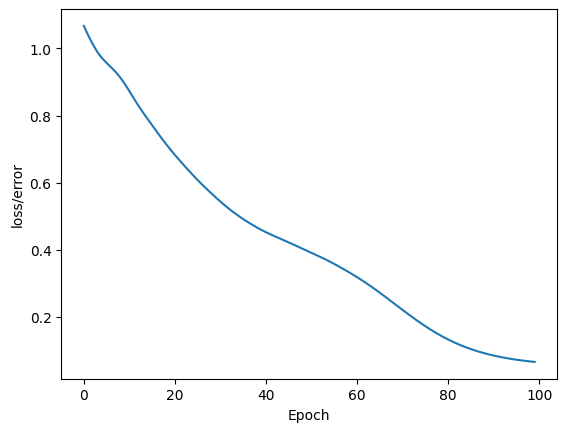

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [19]:
with torch.no_grad(): #turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [20]:
loss

tensor(0.0559)

In [21]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Correct: {correct}')

1.) tensor([  5.8192,   1.0264, -10.9011]) 	 0 	 0
2.) tensor([  5.8146,   1.0263, -10.8884]) 	 0 	 0
3.) tensor([  6.0661,   1.0334, -11.5903]) 	 0 	 0
4.) tensor([  5.8426,   1.0270, -10.9664]) 	 0 	 0
5.) tensor([  6.5178,   1.0461, -12.8513]) 	 0 	 0
6.) tensor([-20.3407,  -2.0274,  10.4943]) 	 2 	 2
7.) tensor([-5.1270,  1.3825, -2.7536]) 	 1 	 1
8.) tensor([  5.9338,   1.0296, -11.2210]) 	 0 	 0
9.) tensor([-12.6179,  -0.6189,   3.6104]) 	 2 	 2
10.) tensor([-5.2902,  1.7269, -3.7792]) 	 1 	 1
11.) tensor([-4.1977,  1.5141, -4.1667]) 	 1 	 1
12.) tensor([  5.6792,   1.0224, -10.5105]) 	 0 	 0
13.) tensor([-4.6225,  1.6577, -3.4563]) 	 1 	 1
14.) tensor([-5.6685,  1.3232, -2.0601]) 	 1 	 1
15.) tensor([-13.6253,  -1.6479,   4.6348]) 	 2 	 2
16.) tensor([  5.9708,   1.0307, -11.3243]) 	 0 	 0
17.) tensor([-9.5650,  0.6743,  0.9491]) 	 1 	 2
18.) tensor([-15.5150,  -1.1076,   5.7026]) 	 2 	 2
19.) tensor([-11.7279,  -1.1108,   3.7868]) 	 2 	 2
20.) tensor([  5.7647,   1.0249, -10.74

In [22]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
  print(model(new_iris))

tensor([  5.7891,   1.0255, -10.8171])


In [24]:
#Save Model
torch.save(model.state_dict(), 'IRIS_model.pt')

In [25]:
new_model = Model()
new_model.load_state_dict(torch.load('IRIS_model.pt'))

<All keys matched successfully>

In [26]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)